# Exploration 08 Deep Learning Starter  
###### 온라인 코어 2기 박수경 

## Boston 주택 가격 예측 모델

### 1. 데이터 로드 및 전처리

먼저 데이터와 필요한 라이브러리들을 불러온다.  
보스턴 주택가격 예측 모델을 위한 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용한다. https://keras.io/datasets에서 데이터셋에 관한 내용을 기본적으로 확인한다. 

In [1]:
from keras import models, layers, optimizers, utils
from keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인.
print(len(train_data))
print(len(test_data))

404
102


각 피처가 의미하는 것은 다음과 같다.  
1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

In [4]:
dir(train_data) #이 데이터셋이 가지고 있는 메서드와 어트리뷰트

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [5]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

표준화 작업을 수행한다. train_data의 평균을 빼고, 표준편차로 나누면 전체적으로 데이터의 값이 평균 0, 표준편차 1과 가깝게 맞춰진다.

In [7]:
b_mean = train_data.mean(axis=0)
train_data -= b_mean

b_std = train_data.std(axis=0)
train_data /= b_std

#평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1에 가까운 데이터가 된다.

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눈다.
test_data -= b_mean
test_data /= b_std

테스트 데이터를 정규화할 때 사용한 값도 훈련 데이터(train_data)에서 계산한 평균과 표준편차이다. 훈련데이터와 실제로 예측할 데이터의 스케일이 같게 맞추어져야 하기 때문이다.

In [8]:
train_data.shape[1]

13

피처가 총 13개임을 확인했다.

### 2. 모델 구성, compile 및 평가

In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(units=64, activation='relu', input_shape=(train_data.shape[1],))) #어떻게 이닛을 줘야 하는가.
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=1)) # 마지막 예측할 주가 y값 1개 이므로 뉴런의 수가 1개!
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [10]:
model = build_model()


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


검증을 위해 K-fold validation을 진행한다. 훈련데이터를 다섯개로 쪼개서 총 5번 진행한다. 검증 데이터를 분리해내고 남은 데이터를 이어붙여 훈련데이터로 삼는다.


In [12]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [13]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [14]:
for i in range(k):
    print('처리중인 폴드 #', i+1)
    # 검증 데이터 설정
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # 남은 데이터를 이어붙여 훈련 데이터 설정
    extra_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    extra_train_lables = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    
    #모델 구성과 컴파일
    model = build_model()

    #모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않음)
    model.fit(extra_train_data, extra_train_lables,
              epochs=num_epochs, batch_size=1, 
              verbose=0)
    #검증 데이터 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)


처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4
처리중인 폴드 # 5


In [15]:
print(all_scores)
print(np.mean(all_scores))

[1.8212521076202393, 2.6748247146606445, 2.362614393234253, 2.7316246032714844, 2.387723922729492]
2.3956079483032227


history로 학습 과정 중 에폭 당 어떻게 mae가 변해가는지를 남기고 리스트에 담아 시각화를 해 본다. 

In [16]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i+1)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_values = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    extra_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    extra_train_values = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    
    #케라스 모델 구성(컴파일 포함)
    model = build_model()
    #모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않음)
    history = model.fit(extra_train_data, extra_train_values,
                        validation_data=(val_data, val_values),
                        epochs=num_epochs, batch_size=1, verbose=0)
    #검증 세트로 모델 평가
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4
처리중인 폴드 # 5


In [17]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

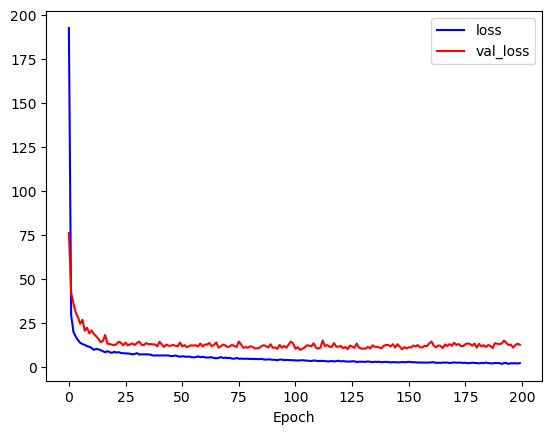

In [18]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show() 

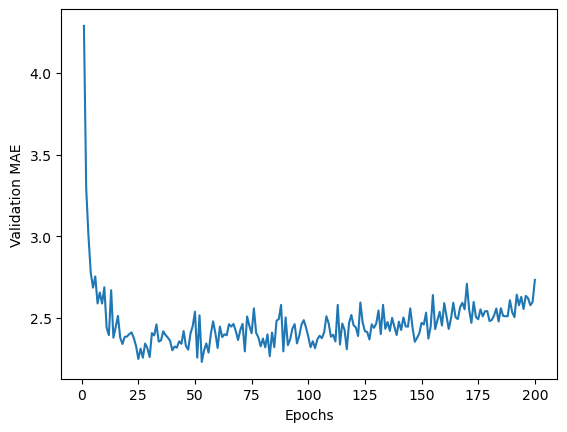

In [19]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Epoch가 대강 50 이상 부터는 MAE도 높아지고 Val_loss 값도 증가한다. 따라서 적당한 에폭을 한 50정도로 설정한다.

In [20]:
model = build_model() #새롭게 컴파일한 모델

#전체 데이터로 훈련한다
model.fit(train_data, train_labels,
          epochs=50, batch_size=32, verbose=0) # 배치 사이즈 2의 제곱을 관습적으로 준다.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.8495 - mae: 2.9357


평가 점수는 다음과 같다.

In [21]:
test_mse_score

21.84952735900879

In [22]:
test_mae_score

2.9357128143310547

## Reuters 딥러닝 모델

### 1. 데이터 로드

reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리한다. 기본 스플릿 비율은 8:2 이므로 test_size= 0.25로 설정해 준다. 각 데이터가 몇 개인지를 출력해 본다.

In [23]:
from keras.datasets import reuters

In [24]:

(reuters_full_train_data, reuters_full_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)
reuters_train_data, reuters_val_data, reuters_train_labels, reuters_val_labels = train_test_split(reuters_full_train_data, reuters_full_train_labels, test_size= 0.25, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력
print(len(reuters_full_train_data))
print(len(reuters_train_data))
print(len(reuters_val_data))
print(len(reuters_test_data))
print(len(set(reuters_full_train_labels)))

8982
6736
2246
2246
46


In [25]:
reuters_train_data[10]

[1,
 2,
 355,
 81,
 8,
 16,
 515,
 4,
 211,
 5,
 25,
 7804,
 707,
 6,
 7804,
 901,
 71,
 10,
 73,
 49,
 1276,
 27,
 2,
 1370,
 4,
 211,
 96,
 34,
 45,
 889,
 2,
 8,
 2,
 2,
 3587,
 611,
 23,
 68,
 5,
 4,
 895,
 473,
 398,
 5,
 8203,
 2759,
 2,
 13,
 4,
 3336,
 9,
 577,
 1107,
 2,
 9,
 9876,
 422,
 16,
 8,
 4,
 611,
 3797,
 445,
 872,
 2,
 8,
 16,
 830,
 6,
 337,
 4,
 707,
 6,
 449,
 242,
 5,
 4,
 8203,
 2759,
 2,
 218,
 17,
 12]

In [26]:
reuters_train_labels[10]

4

숫자 토큰화된 문장들을 다시 디코딩하려면 아래와 같은 코드를 수행하면 된다.

In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in reuters_train_data[0]]) #0, 1, 2는 ‘패딩’, ‘문서 시작’, ‘사전에 없음’을 위한 인덱스이므로 3을 뺍니다.

In [28]:
decoded_newswire

'? ended january 31 oper shr profit 3 98 dlrs vs profit 4 35 dlrs oper net profit 123 6 mln vs profit 108 3 mln revs 1 88 billion vs 1 76 billion year oper shr profit 32 cts vs loss 1 23 dlrs oper net profit 33 0 mln vs loss 9 055 000 revs 5 69 billion vs 5 27 billion note 1986 excludes writeoff of 40 4 mln dlrs primarily due to investment in dome petroleum ltd lt dmp reuter 3'

텍스트 데이터를 원 핫 인코딩 한다. word를 10000개만 불러왔으므로 dimension=10000으로 설정한다. 훈련, 검증, 예측 데이터를 원-핫 인코딩하고 레이블은 utils.to_categorical 메서드로 쉽게 범주형 원-핫 인코딩을 할 수 있다.

In [29]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results


In [30]:
reuters_train_data_enc = one_hot_encoding(reuters_train_data)
reuters_val_data_enc = one_hot_encoding(reuters_val_data)
reuters_test_data_enc = one_hot_encoding(reuters_test_data)

In [31]:

reuters_train_labels_enc = utils.to_categorical(reuters_train_labels)
reuters_val_labels_enc = utils.to_categorical(reuters_val_labels)
reuters_test_labels_enc = utils.to_categorical(reuters_test_labels)

print(reuters_train_labels_enc[33])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 2. 모델 구성 및 학습

빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성한다. 배치정규화는 활성화함수를 통과하기 전에 수행한다.  

In [32]:
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(Dropout(0.1))
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                     

콜백 함수의 종류인 ModelCheckpoint, EarlyStopping을 이용하여 학습을 더 효율적으로 할 수 있도록 설정한다. ModelCheckpoint 정기적으로 모델의 체크포인트를 저장해 문제가 생길 경우 복구를 도와줄 수 있다. EarlyStopping은 patience를 지정해 성능이 그 에폭동안 개선되지 않으면 자동으로 학습을 중단해 무의미하게 에폭이 계속 진행되는 것을 방지할 수 있다.

In [33]:
model.save('reuters_model')

INFO:tensorflow:Assets written to: reuters_model\assets


In [34]:
from keras import callbacks

In [35]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model', save_best_only=True)

In [36]:
early_stopping_cb = callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                  restore_best_weights=True)

In [37]:
reuters_history = model.fit(reuters_train_data_enc, reuters_train_labels_enc,
                               epochs=100,
                               batch_size=512,
                               validation_data=(reuters_val_data_enc, reuters_val_labels_enc),
                               callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
14/14 [==============================] - 2s 102ms/step - loss: 2.4076 - accuracy: 0.5123 - val_loss: 3.3161 - val_accuracy: 0.7044
Epoch 2/100
14/14 [==============================] - 1s 97ms/step - loss: 1.3257 - accuracy: 0.7329 - val_loss: 3.0650 - val_accuracy: 0.7435
Epoch 3/100
14/14 [==============================] - 1s 86ms/step - loss: 0.9901 - accuracy: 0.7882 - val_loss: 2.7789 - val_accuracy: 0.7516
Epoch 4/100
14/14 [==============================] - 1s 87ms/step - loss: 0.7949 - accuracy: 0.8230 - val_loss: 2.5224 - val_accuracy: 0.7248
Epoch 5/100
14/14 [==============================] - 1s 89ms/step - loss: 0.6652 - accuracy: 0.8472 - val_loss: 2.2494 - val_accuracy: 0.7386
Epoch 6/100
14/14 [==============================] - 1s 99ms/step - loss: 0.5507 - accuracy: 0.8766 - val_loss: 1.9735 - val_accuracy: 0.7186
Epoch 7/100
14/14 [==============================] - 1s 86ms/step - loss: 0.4697 - accuracy: 0.8921 - val_loss: 1.8119 - val_accuracy: 0.6732
Epoch

### 3. 평가 및 시각화

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화한다.

In [38]:
reuters_test_data
reuters_test_labels

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

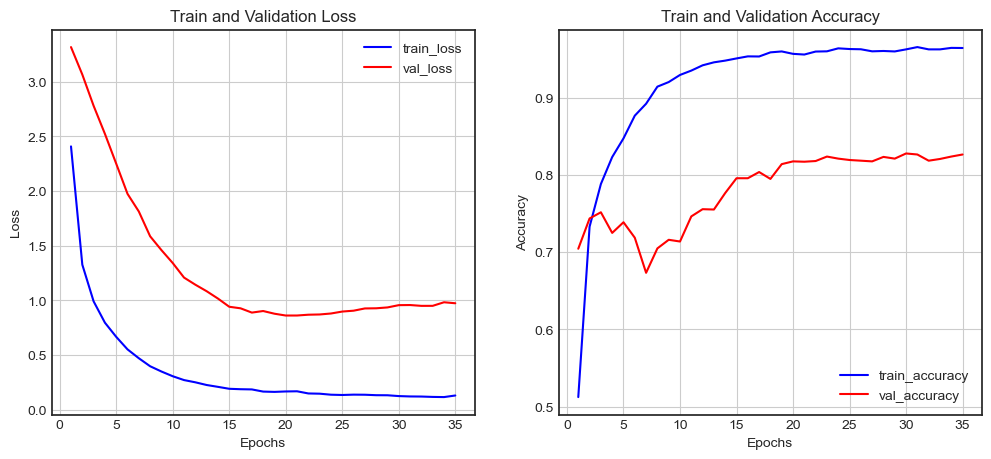

In [39]:
plt.style.use('seaborn-white')

history_dict = reuters_history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 성능을 다음과 같이 평가할 수 있다.

In [40]:
model.evaluate(reuters_test_data_enc, reuters_test_labels_enc)

71/71 [==============================] - 0s 4ms/step - loss: 0.9311 - accuracy: 0.7947


[0.9311109185218811, 0.7947462201118469]

## CIFAR10 딥러닝 모델

### 1. 데이터 로드 

In [41]:
from keras.datasets import cifar10

케라스의 cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리한다.

In [42]:
(cifa_full_train_data, cifa_full_train_labels), (cifa_test_data, cifa_test_labels) = cifar10.load_data()
cifa_train_data, cifa_val_data, cifa_train_labels, cifa_val_labels = train_test_split(cifa_full_train_data, cifa_full_train_labels, test_size= 0.2, random_state=2023)


훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력해 본다. 데이터셋의 크기를 짐작할 수 있다.

In [43]:
print(len(cifa_full_train_data))
print(len(cifa_train_data))
print(len(cifa_val_data))
print(len(cifa_test_data))



print("전체 학습 데이터: {} 레이블: {}".format(cifa_full_train_data.shape, cifa_full_train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(cifa_train_data.shape, cifa_train_labels.shape))
print("검증 데이터: {} 레이블: {}".format(cifa_val_data.shape, cifa_val_labels.shape))
print("테스트 데이터: {} 레이블: {}".format(cifa_test_data.shape, cifa_test_labels.shape))

50000
40000
10000
10000
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


cifar10의 분류의 각 레이블 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name 리스트로 만든다.

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

훈련 데이터의 첫번째 이미지가 어떤지 시각화 해 본다.

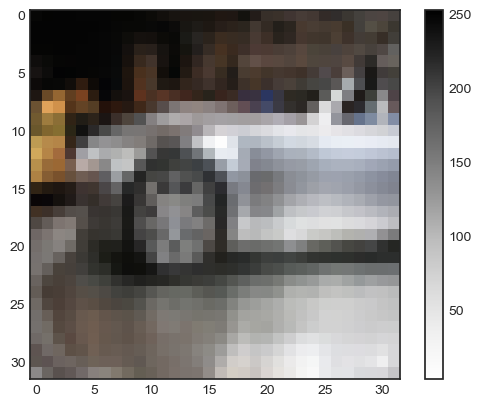

In [45]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(cifa_train_data[0])
plt.colorbar()
plt.show()

### 2. 데이터 Flatten과 scaling

훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형한다. 가로세로 32개씩의 픽셀, 컬러이미지이므로 rgb 3개의 채널의 값이 존재하기 때문이다. reshape 함수를 이용할 때 -1값은 자동으로 shape를 맞춰주는 의미다.

In [46]:
cifa_train_data = cifa_train_data.reshape(-1, 32 * 32 * 3) #flatten
cifa_val_data = cifa_val_data.reshape(-1, 32 * 32 * 3)
cifa_test_data = cifa_test_data.reshape(-1, 32 * 32 * 3)


print(cifa_train_data.shape)
print(cifa_val_data.shape)
print(cifa_test_data.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


각 컬러값은 0~255의 값을 가지고 있다. 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 스케일링한다.

In [47]:
cifa_train_data = cifa_train_data / 255.
cifa_val_data = cifa_val_data / 255.
cifa_test_data = cifa_test_data / 255.

In [48]:
print(cifa_train_data[0])

[0.02745098 0.02745098 0.02352941 ... 0.77254902 0.76862745 0.78039216]


### 3. 모델 구성및 학습

In [49]:
cifa_model = models.Sequential()
cifa_model.add(layers.Input(shape=(3072, )))
cifa_model.add(layers.BatchNormalization())
cifa_model.add(layers.Activation('sigmoid'))
cifa_model.add(Dropout(0.5))
cifa_model.add(layers.Dense(1024))
cifa_model.add(layers.BatchNormalization())
cifa_model.add(layers.Activation('sigmoid'))
cifa_model.add(layers.Dense(10, activation='softmax'))
cifa_model.summary()

cifa_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 3072)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 1024)              3146752   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 1024)            

In [50]:
cifa_history = cifa_model.fit(cifa_train_data, cifa_train_labels,
                    epochs=60,
                    batch_size=512,
                    validation_data=(cifa_val_data, cifa_val_labels))

Epoch 1/60
79/79 [==============================] - 4s 40ms/step - loss: 2.2922 - accuracy: 0.1353 - val_loss: 2.3582 - val_accuracy: 0.0942
Epoch 2/60
79/79 [==============================] - 3s 37ms/step - loss: 2.2046 - accuracy: 0.1872 - val_loss: 2.3432 - val_accuracy: 0.0945
Epoch 3/60
79/79 [==============================] - 3s 36ms/step - loss: 2.1495 - accuracy: 0.2209 - val_loss: 2.2435 - val_accuracy: 0.1577
Epoch 4/60
79/79 [==============================] - 3s 36ms/step - loss: 2.1160 - accuracy: 0.2343 - val_loss: 2.1107 - val_accuracy: 0.2195
Epoch 5/60
79/79 [==============================] - 3s 37ms/step - loss: 2.0875 - accuracy: 0.2512 - val_loss: 2.0437 - val_accuracy: 0.2738
Epoch 6/60
79/79 [==============================] - 3s 37ms/step - loss: 2.0631 - accuracy: 0.2598 - val_loss: 2.0259 - val_accuracy: 0.2602
Epoch 7/60
79/79 [==============================] - 3s 38ms/step - loss: 2.0465 - accuracy: 0.2672 - val_loss: 1.9820 - val_accuracy: 0.3078
Epoch 8/60
79

### 4. 평가 및 시각화

학습 과정동안 history에 기록된 값으로 loss, val_loss, accuracy, val_accuracy를 시각화 한다.

In [51]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

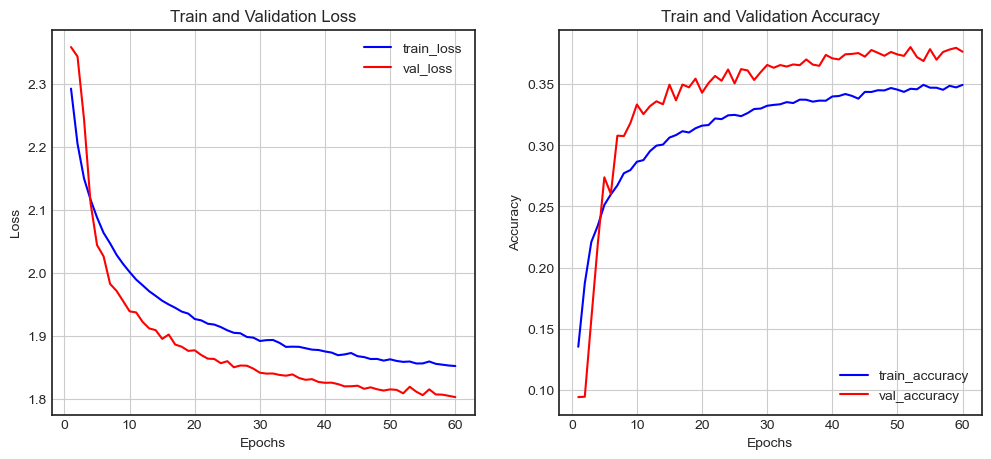

In [52]:
show_history(cifa_history)

학습이 진행된 것을 확인할 수 있다. 모델 성능을 평가한다.

In [53]:
cifa_model.evaluate(cifa_test_data, cifa_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.7934 - accuracy: 0.3760


[1.7933872938156128, 0.37599998712539673]

점수가 너무 낮아서 모델이 실질적으로 어떻게 분류를 수행하고 있는지를 한 번 보기로 한다.   
아래는 임의로 모델이 한 이미지를 어떻게 분류했는지를 알아보기 위한 과정이다.

In [54]:
pred_ys = cifa_model.predict(cifa_test_data)
print(pred_ys[11])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[11])
print(class_names[arg_pred_y[11]])

313/313 [==============================] - 1s 2ms/step
[0.00846564 0.28670827 0.0050941  0.00566315 0.00260065 0.00540793
 0.00495329 0.01274711 0.03801106 0.6303487 ]
9
truck


12번째 이미지를 트럭으로 예측했다. 실제로 어떤 이미지인지 보기위해 출력을 해 보았다.

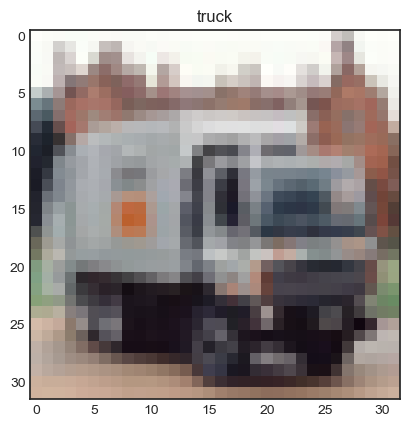

In [55]:
plt.imshow(cifa_test_data[11].reshape(32 , 32 , 3))
plt.title(class_names[arg_pred_y[11]])
plt.show()

트럭이 맞다. 제대로 예측하고 있는 이미지도 있기는 있었다. 하지만 정확도가 너무 떨어져서 불만족스러운 결과였다.

## Discussion

- 데이터의 표준정규화  
  보스턴 주택 가격을 예측할 때 처음 데이터의 평균을 빼고 표준편차를 나누는 작업을 시행하였다. 데이터를 모델에 학습시킬 때 적절하게 스케일링을 하는 작업이 세가지 문제 모두에서 적용되었는데 그만큼 중요하다고 느꼈다. 데이터(배치)를 정규화하는 것이 학습의 속도와 효과에 영향을 미치기 때문에 앞으로 데이터를 다룰 때 꼭 내용을 확인하고 정규화할 필요가 있으면 알맞은 크기로 변환시켜야겠다고 느꼈다. 또한 그렇게 정규화를 거치고 나면 반드시 예측할 테스트 데이터도 동일하게 스케일링을 해 주어야 학습에 지장이 없다는 것도 계속 주의해서 진행할 필요가 있다.

- K-fold 검증의 의의  
  k-fold 검증 과정은 학습 데이터의 일부를 떼어서 검증데이터로 둔다. 나머지로 학습을 하고 난 다음, 정답을 알아내야 하는 실전에 바로 모델을 적용하기 전에 얼마나 이 모델이 잘 구성되었는지 떼어둔 검증 데이터로 한 번 평가해 본다. 그 과정에서 train/ validation/ test 의 정확한 개념을 다시 생각해 볼 수 있었다. k번 진행하는 과정을 통해 5개의 평가지표가 나오게 되고 하이퍼파라미터를 정하는 등 모델을 최적화하고자 할 때 활용할 수 있는 방법이었다.

- 이미지 다중분류 모델의 성능 개선  
  세번째 문제 이미지 다중 분류 모델의 성능이 너무 떨어지는 결과가 나왔다. 다른 사람들의 코드를 참고해 보니 모델 구성이 더 복잡하고 층이 많으며, 활성화 함수와 커널의 이니셜라이저도 설정한 것을 확인할 수 있었다. 나는 아직 모델을 단순하게 구성할 줄만 아는데 이미지 처리를 위한 CNN모델을 더 풍부하게 구사하고 싶다는 생각이 들었다.

## Reference  

보스턴 주택가격 예측 (https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)  
보스턴 주택가격 예측 전반적인 과정 참고(https://foxtrotin.tistory.com/468)  

dropout(https://wikidocs.net/61374)  
로이터 기사 분류 (https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-5-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EB%B6%84%EB%A5%98-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AC%B8%EC%A0%9C/)  
로이터 뉴스 데이터셋 이해 (https://wikidocs.net/22933)  
categorical_crossentropy와 sparse_categorical_crossentropy의 차이 (https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c)  
CIFAR10 다중분류모델 높은 성능의 코드 (https://www.kaggle.com/code/miintto/cifar-10-by) 



